# Multivariate Exploratory Data Analysis (EDA)

This section performs a quick multivariate EDA on the data. The goal is to provide a general understanding of relationships between variables.

- `id`: unique row identifier;
- `Time_spent_Alone`: Hours spent alone daily (0–11).
- `Stage_fear:` Presence of stage fright (Yes/No).
- `Social_event_attendance`: Frequency of social events (0–10).
- `Going_outside`: Frequency of going outside (0–7).
- `Drained_after_socializing`: Feeling drained after socializing (Yes/No).
- `Friends_circle_size`: Number of close friends (0–15).
- `Post_frequency`: Social media post frequency (0–10).
- `Personality`: Target variable (Extrovert/Introvert).*

---

Findings:
- Clear separability between target classes;
- Some features are equivalent or highly correlated (i.e., culling);
- Most of the samples should be "easy" to classify;
    - The most complex samples could be treated as outliers;
- Simple models should perform fairly well;

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(
    "../data/competition/train.csv",
    dtype={
        "id": pd.Int16Dtype(),
        "Time_spent_Alone": pd.Int8Dtype(),
        "Social_event_attendance": pd.Int8Dtype(),
        "Going_outside": pd.Int8Dtype(),
        "Friends_circle_size": pd.Int8Dtype(),
        "Post_frequency": pd.Int8Dtype(),
    },
)

## Categorical to Numerical

Convert categorical features to numeric. This allow us to consider those variables in the analysis.

In [2]:
mapper = {"Yes": 1, "No": 0}
inverse_mapper = {v: k for k, v in mapper.items()}
for col in ["Stage_fear", "Drained_after_socializing"]:
    df[col] = df[col].map(mapper).astype(pd.Int8Dtype())

## Scatterplot Matrices (SPLOM)

Quick glance on relationship between numerical variables.

- As the univariate EDA suggested, there is indeed a clear difference between personalities for single variables;
- The same holds for the pairwise comparison of variables;
    - All variables have clear distinction patterns based on personality;
    - The real problem is on the _overlap_ between the personalities;
- There also seems to exist correlation between the variables;
    - The introvert group seems to have a more noticeable relationship;

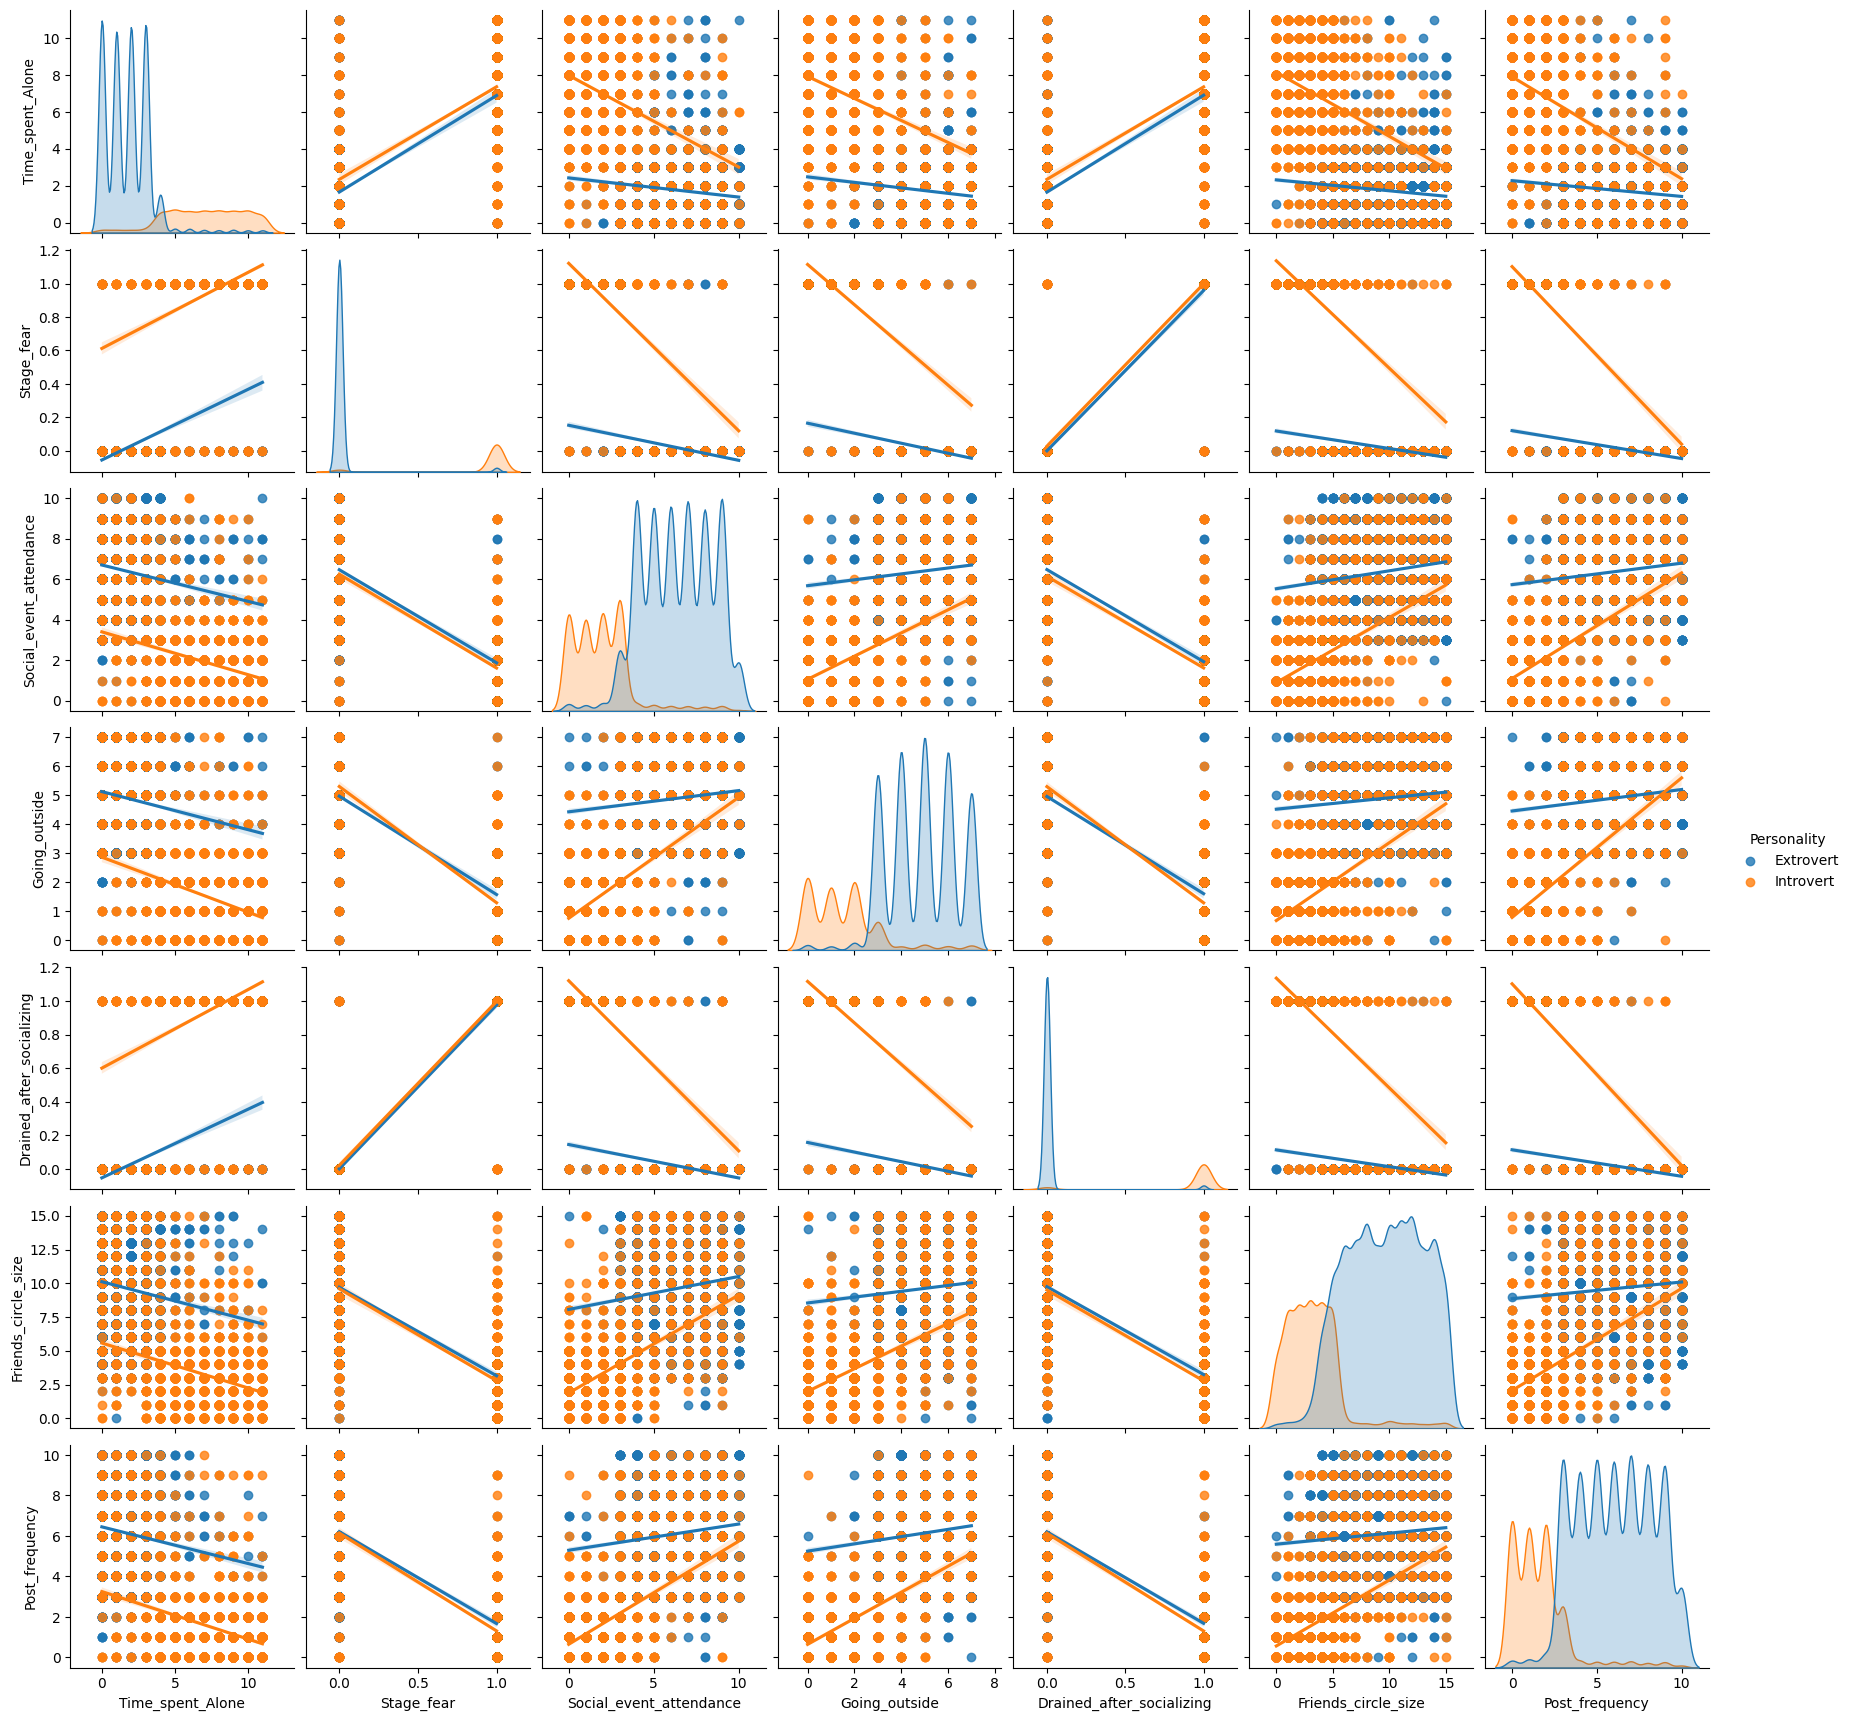

In [3]:
sns.pairplot(df.drop(columns="id"), hue="Personality", kind="reg")

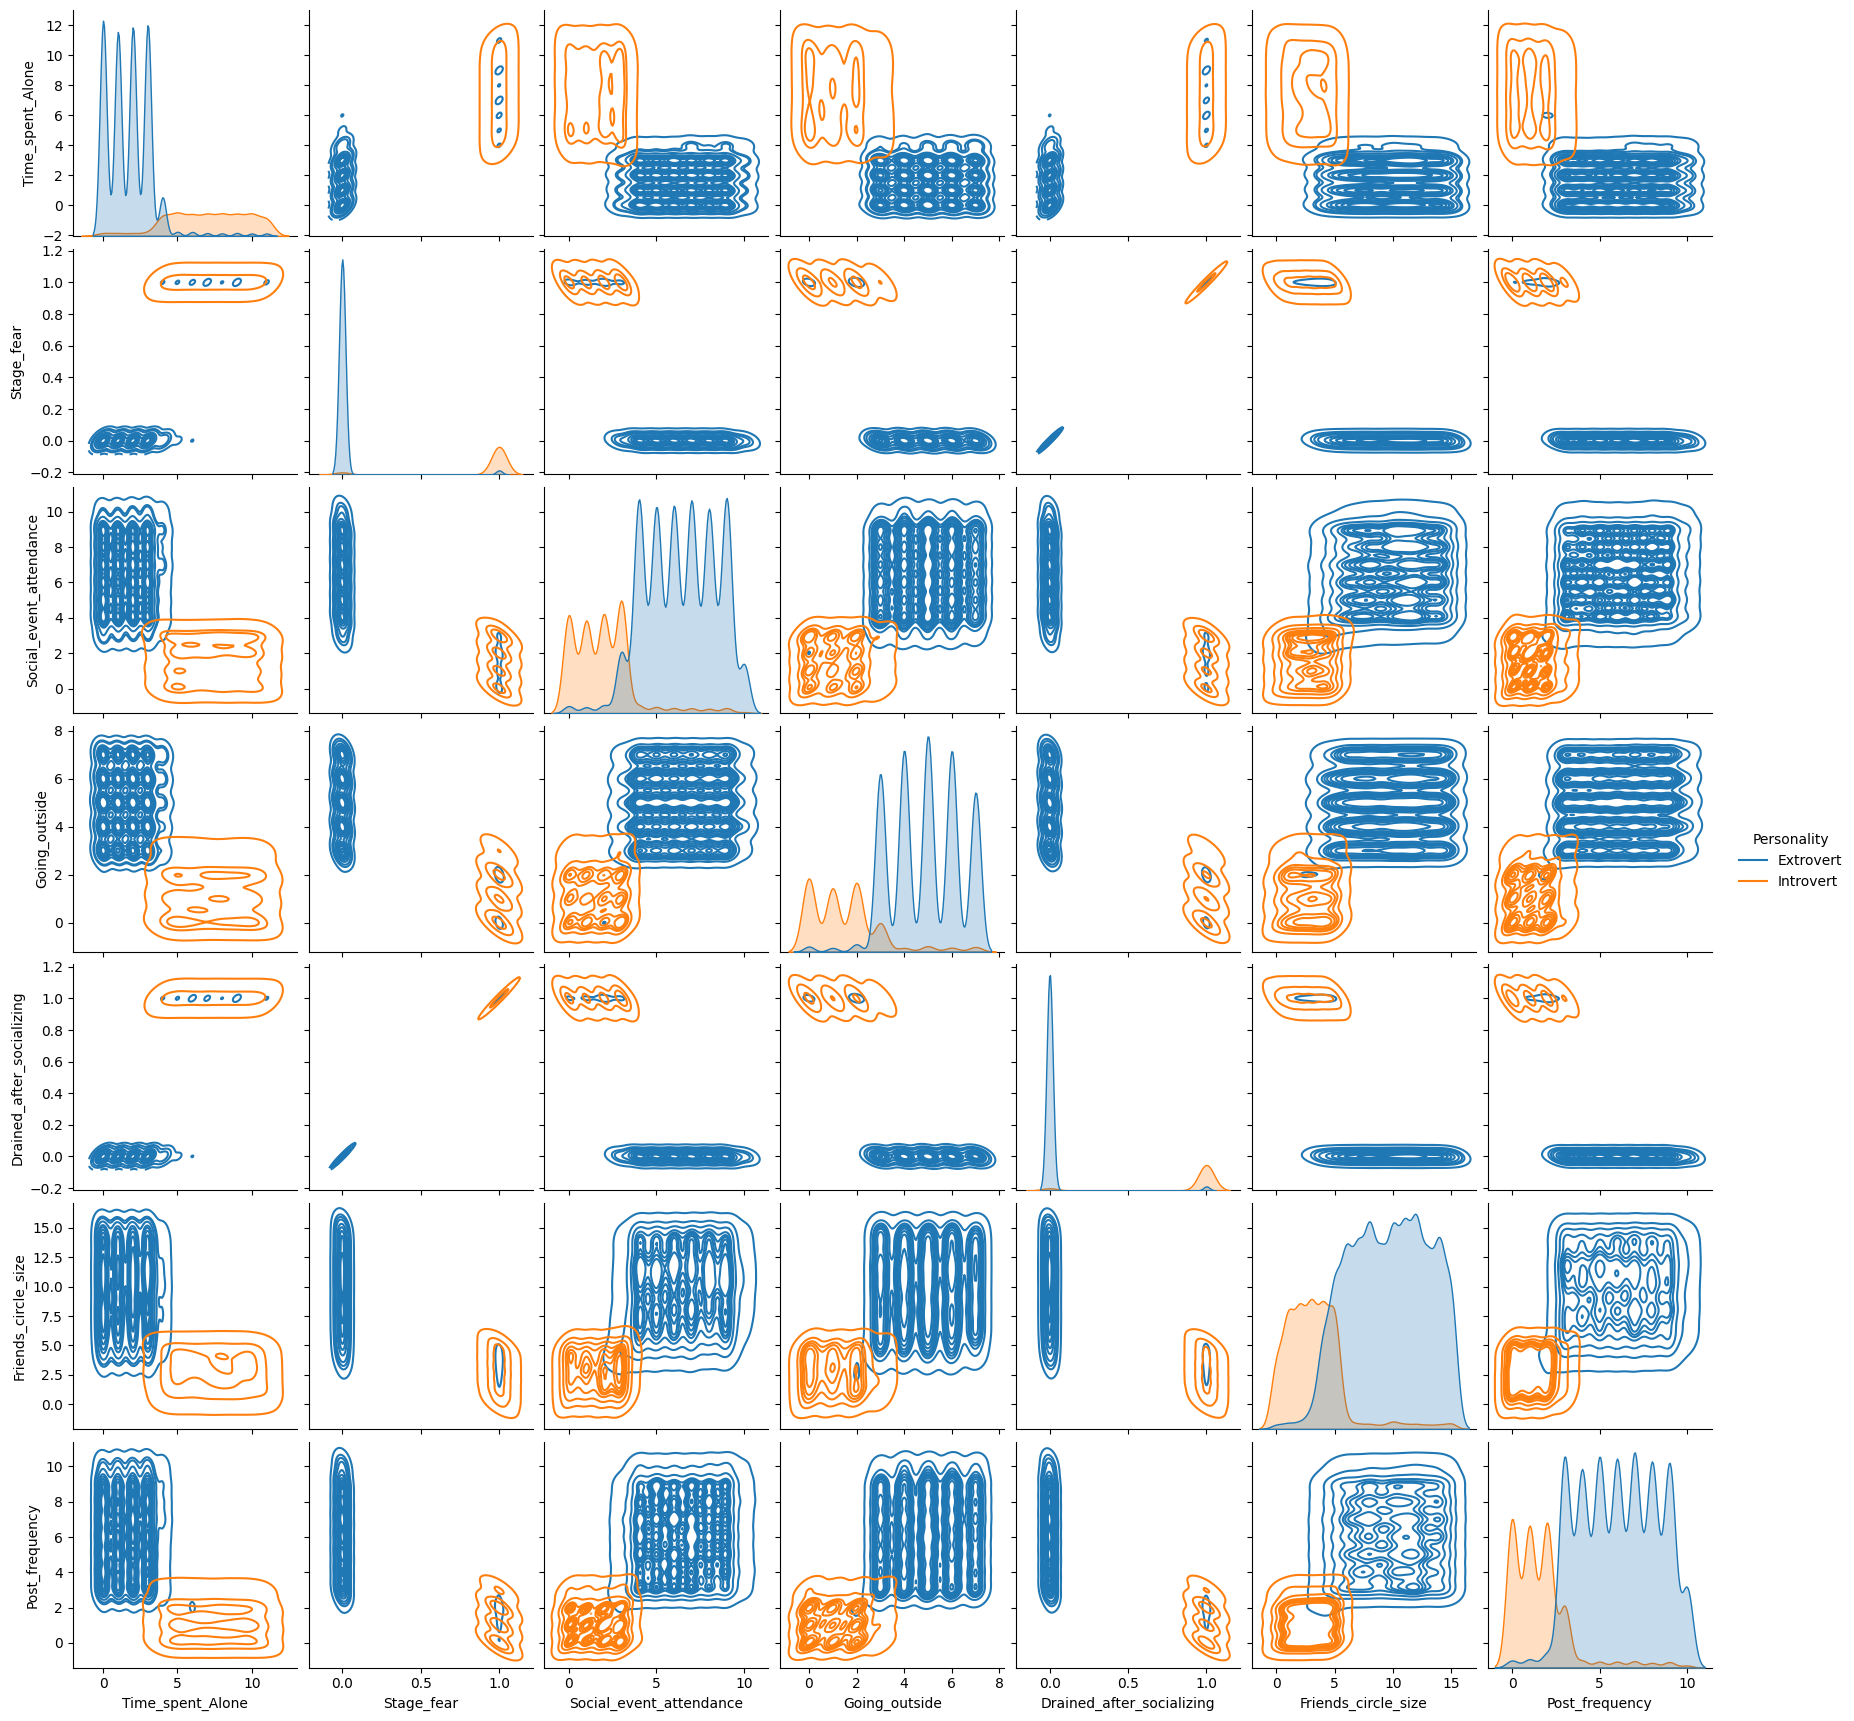

In [4]:
sns.pairplot(df.drop(columns="id"), hue="Personality", kind="kde")

## Correlation Analysis

- Some features are highly correlated;
    - `Drained_after_socializing` and `Stage_fear` seem roughly equivalent;
    - `Drained_after_socializing` and `Time_spent_Alone` are highly correlated (0.83);
- The pairwise correlations vary from positive to negative;

<Axes: >

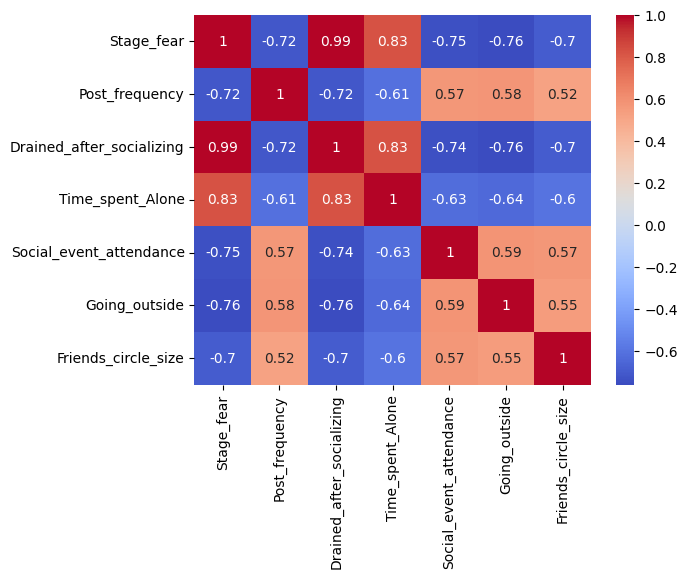

In [5]:
sns.heatmap(
    df[list(set(df.columns) - set(["id", "Personality"]))].corr(),
    annot=True,
    cmap="coolwarm",
)

## Principal Component Analysis (PCA)

- Data seems very separable based on the first component;
- There exists a number of outliers which might make learning harder without gains;

In [6]:
# Data has NaN's, using a simple impute based on mean. Using a standard
#   normalization to avoid variables with higher manitude to "dominate" others.
X_pca = PCA(n_components=2).fit_transform(
    StandardScaler().fit_transform(
        SimpleImputer(strategy="mean").fit_transform(
            df[
                [
                    "Time_spent_Alone",
                    "Stage_fear",
                    "Social_event_attendance",
                    "Going_outside",
                    "Drained_after_socializing",
                    "Friends_circle_size",
                    "Post_frequency",
                ]
            ]
        )
    )
)
df_pca = pd.DataFrame(
    {
        "Personality": df["Personality"].values,
        **{f"X_{i}": v for i, v in enumerate(X_pca.T)},
    }
)
del X_pca

<Axes: xlabel='X_0', ylabel='X_1'>

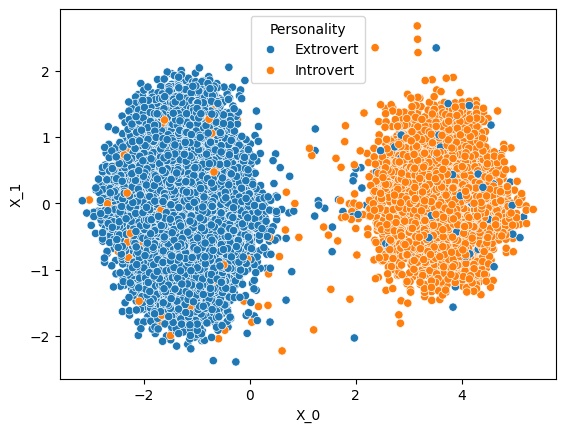

In [7]:
sns.scatterplot(df_pca, x="X_0", y="X_1", hue="Personality")

<Axes: xlabel='X_0', ylabel='X_1'>

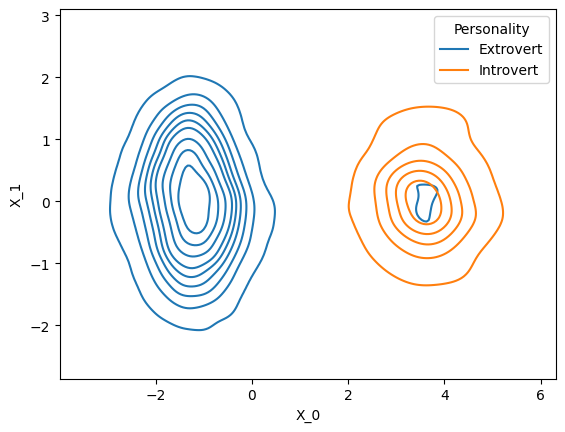

In [8]:
sns.kdeplot(df_pca, x="X_0", y="X_1", hue="Personality")

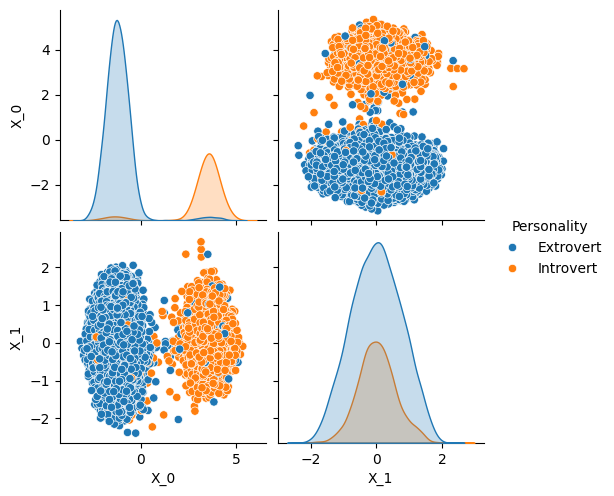

In [9]:
sns.pairplot(df_pca, hue="Personality")